## Module_3:

## Team Members:
*Jack O'Hearn, Wyatt Young*

## Project Title: Angiogenesis Genes in Lung Cancer to Differentiate LUAD from LUSC
*Module 3 Hallmarks of Cancer*



## Project Goal:
This project seeks to understand the mechanism and associated genes of angiogenesis in lung cancer and determine if there are genes or markers related to this hallmark. Specifically, our goal is to use certain gene expression levels to differentiate between LUAD and LUSC cancers.

## Disease Background:

* Cancer hallmark focus: evading angiogenesis
* Overview of hallmark: Evading apoptosis is the ability for nearly all cancer cells to circumvent the cells natural process of programed cell death. Without cell death, malignant cells can continue to reproduce and spread their altered genes that allows cancer to continue to grow harmful tumors within the body. Evading this normal regulation is a hallmark of cancer growth and exponential reproduction. The main pathway of evading apoptosis is through inactivation of the p53 protein. This protein can upregulate proapoptotic expression through BAX after DNA damage. BAX in turn stimulates mitochondrial release of cytochrome C which promotes apoptosis. Without this p53 activated circuit, apoptosis can be down regulated and evaded. 
* Genes associated with hallmark to be studied (describe the role of each gene, signaling pathway, or gene set you are going to investigate): TP53 gene which is what produces the p53 protein is the gene and protein most associated with evading angionesis. This protein works by upregulating the expression of the BCL2 gene which is responsible for producing BAX which promotes apoptosis after DNA damage.  

* Prevalence: 654,000 cases of lung cancer are in the US today.
* Incidence: 226,000 is the estimated number of cases of lung cancer for 2025 in the US.
* Risk factors (genetic, lifestyle) & Societal determinants: Smoking cigarettes is a major risk factor for developing lung cancer, as well as living or working in areas with poor air quality in general. Family history and mutations in the EGFR, KRAS, and ALK genes increase the risk for lung cancer. Limitied heathcare, environment, and poverty are all societal determinants for lung cancer as well.
* Standard of care treatments (& reimbursement): Surgery, chemotherapy, and radiation are the primary treatments for lung cancer. Other options include a lung transplant but this is only an option when the patient has been cancer free for a period of time.  
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology): Lung cancer prevents the lungs from its normal process of gas exchange and starts in the bronchi or alveoli. The mechanism includes tumor formation that immune invasion, angiogenesis, and spreading of the cancer throughout the lungs. Often the tumor metastasize quickly and spreads to other organs and bone. 


## Data-Set: 

The data for our analysis come from The Cancer Genome Atlas (TCGA) RNA-sequencing dataset, which was re-processed by Rahman et al.. Expression levels are comparable across cancer types. The dataset includes 24 different cancers, with RNA-seq values expressed as log₂(TPM + 1) (Transcripts Per Million).

The dataset was subsetted to include the 3,000 most variable protein-coding genes out of 15,000 total genes, across 1,802 tumor samples (out of 9264 total). This is typically 50–100 per cancer type. The metadata file provides approximately 70 clinical and molecular variables for each sample, such as patient age, tumor stage, histological subtype, as well as survival outcomes. The metadata codebook explains what each variable means, as well as variable type, and the metadata percent non-NA file shows how complete each variable is across different cancer types.

Survival data was added from the Pan-Cancer Clinical Data Resource (Liu et al., 2018), which provides several outcome measures. Some examples are overall survival (OS), disease-specific survival (DSS), progression-free interval (PFI), and disease-free interval (DFI).

The two cancer types we will be focused on in our analysis are LUAD (lung adenocarcinoma) and LUSC (lung squamous cell carcinoma). The variables for both of these are of similar completeness, both having about 50% of variables being complete enough for analysis. This includes general clinical background like race, gender, ehtnicity. It also includes radiation treatment status, tumor status, and survival related variables.

These files specifically will be used for our analysis:

GSE62944_subsample_log2TPM.csv
GSE62944_subsample_topVar_log2TPM.csv
GSE62944_metadata.csv
subsampled_TCGA_CDR_survival.csv

## Data Analyis: 

### Methods

The machine learning technique I am using is logistic regression, which is a supervised classification method that models the probability that each lung tumor sample belongs to LUAD or LUSC. The model learns a weighted combination of gene expression values TP53, VEGFA, HIF1A, ANGPT2, FLT1 which are all related to angiogenesis and uses these coefficients to separate the two cancer types. Biologically the different genes express different vasculature and hypoxia pathways which is how our model is able to distinguish the cancer types.

This method optimizes the cross-entropy loss (log-loss), which measures how well the predicted class probabilities match the true labels. Logistic regression adjusts its coefficients to minimize this loss while also applying L2 regularization to prevent overfitting.

The model decides it is good enough when the optimization algorithm converges—meaning further updates no longer improve the loss and when performance on the held-out test set is high. In this case, accuracy, F1-score, ROC AUC, and precision-recall AUC on the test data are all strong, indicating the model generalizes well to new samples.

### Analysis



cancer_type
LUAD    80
LUSC    80
Name: count, dtype: int64
Lung samples in metadata: 160
Expression genes: 15,716, lung samples: 160
df shape: (160, 6)
Columns: ['TP53', 'VEGFA', 'HIF1A', 'ANGPT2', 'FLT1', 'cancer_type']
                                  TP53     VEGFA     HIF1A    ANGPT2      FLT1 cancer_type
sample_id                                                                                 
TCGA-44-8117-01A-11R-2241-07  3.533095  9.701291  6.736848  3.030111  4.151444        LUAD
TCGA-50-5936-01A-11R-1628-07  5.960825  6.493070  6.753303  3.582496  4.130102        LUAD
TCGA-55-A494-01A-11R-A24X-07  6.236896  9.863876  5.849348  4.003857  4.178755        LUAD
TCGA-78-7160-01A-11R-2039-07  6.803066  6.842713  7.120642  2.753598  4.723887        LUAD
TCGA-78-7158-01A-11R-2039-07  7.446952  6.778299  6.417706  1.361158  2.384635        LUAD


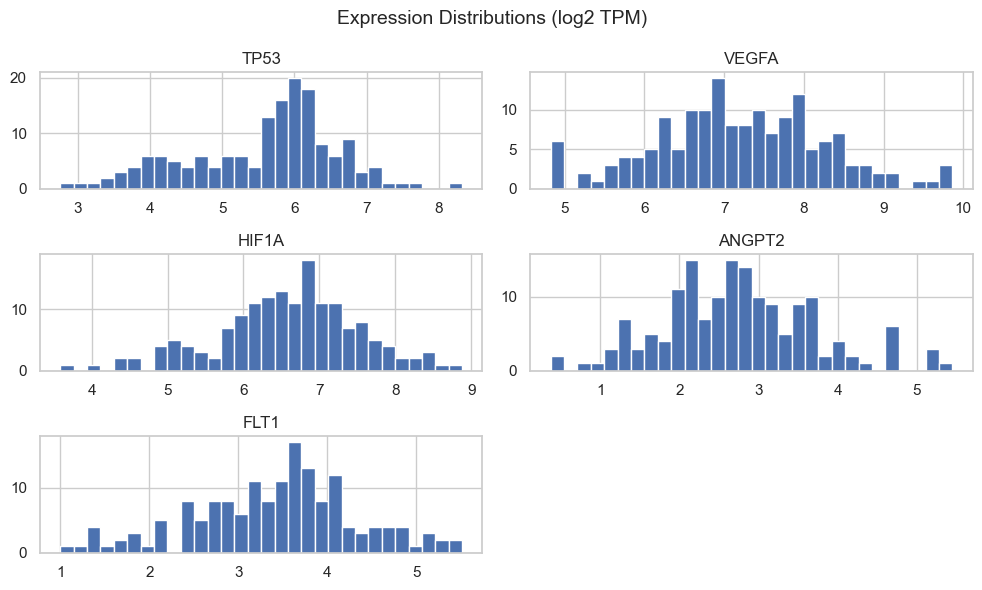

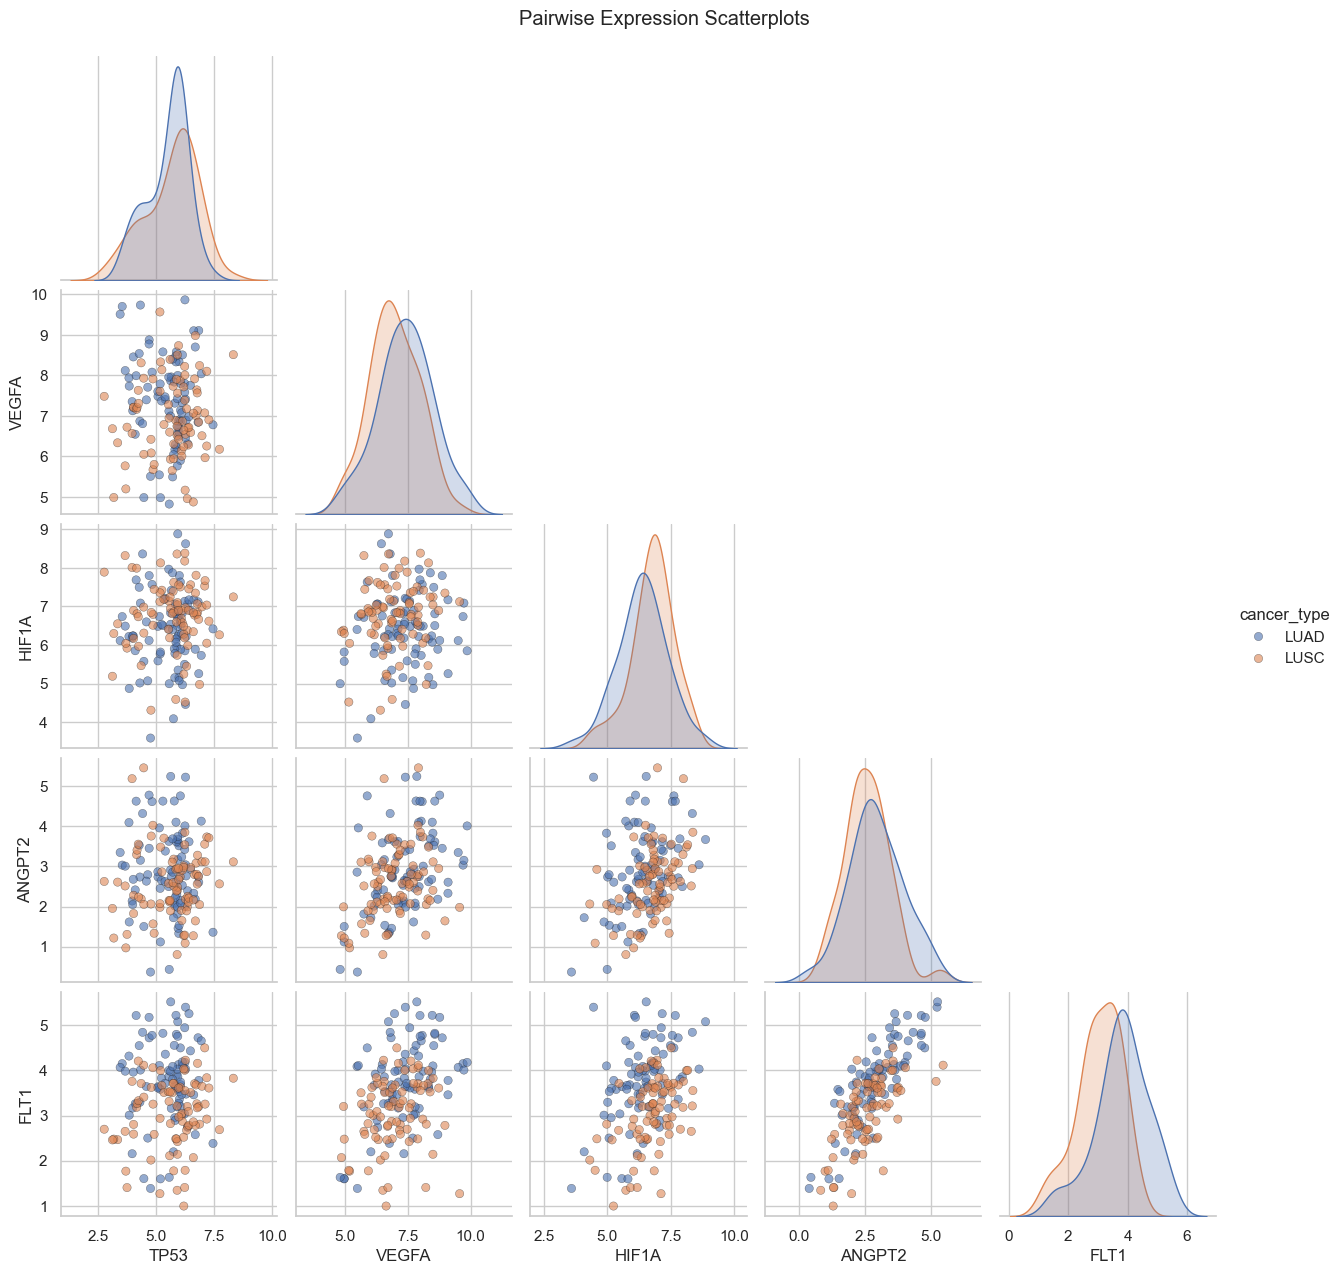

Spearman correlations (lung overall):
             TP53     VEGFA     HIF1A    ANGPT2      FLT1
TP53    1.000000 -0.034616  0.062859  0.020315  0.032245
VEGFA  -0.034616  1.000000  0.062821  0.380810  0.394044
HIF1A   0.062859  0.062821  1.000000  0.333546  0.275217
ANGPT2  0.020315  0.380810  0.333546  1.000000  0.742614
FLT1    0.032245  0.394044  0.275217  0.742614  1.000000


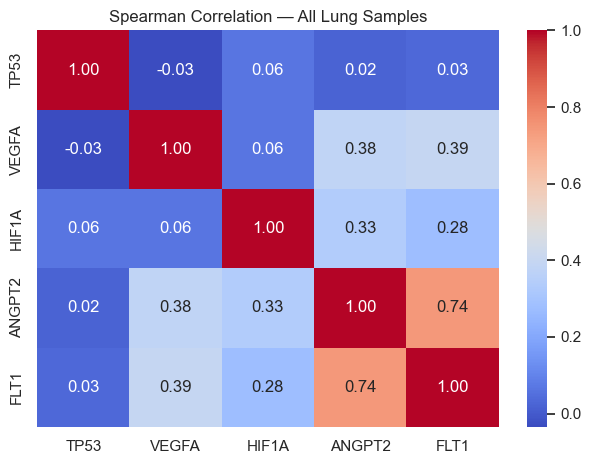

Label encoding: {'LUAD': np.int64(0), 'LUSC': np.int64(1)}

=== Logistic Regression (5-gene panel) — Test set ===
Accuracy: 0.844
F1-score: 0.848
ROC AUC : 0.934
PR  AUC : 0.952


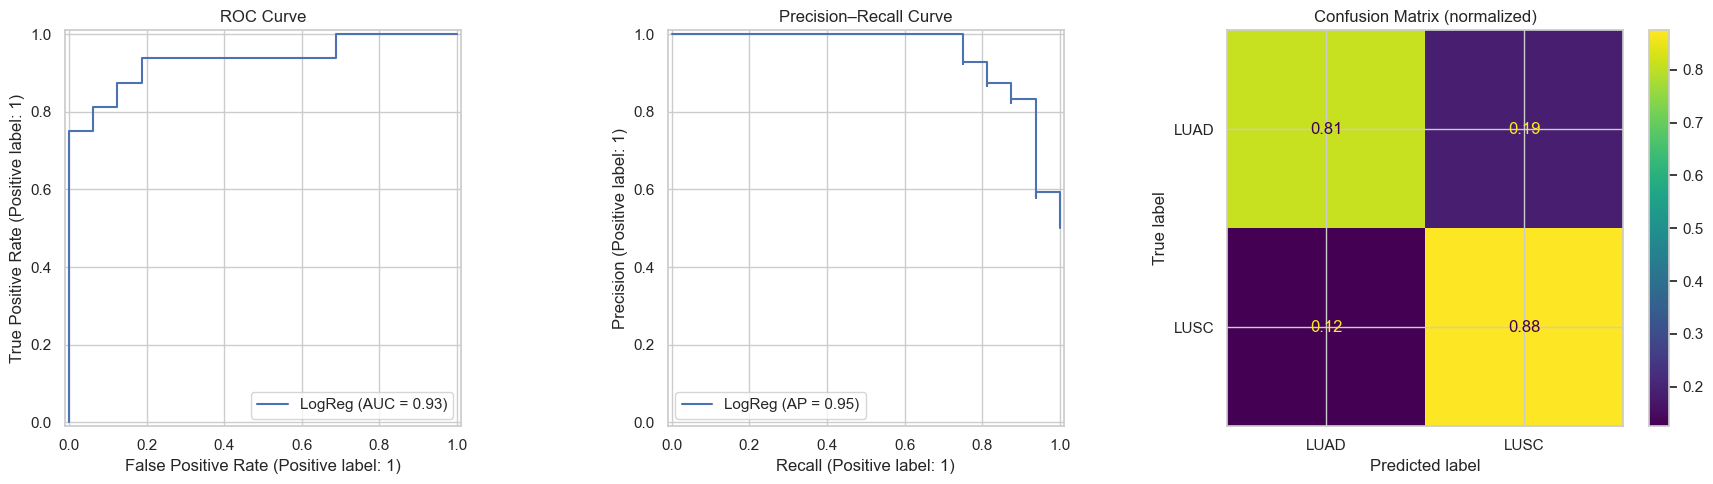


Top features by |coefficient|:
feature      coef
   FLT1 -1.608109
  HIF1A  0.628050
 ANGPT2  0.500068
   TP53  0.222143
  VEGFA -0.108949


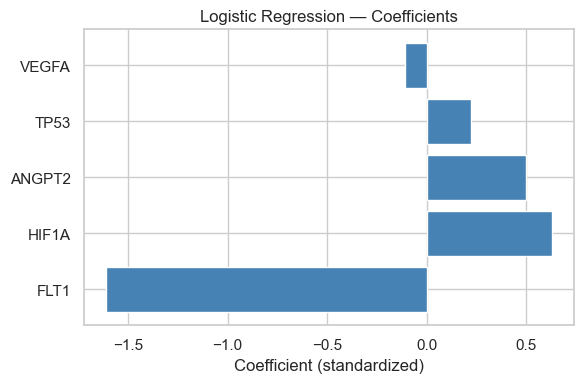

In [1]:
# main.py — Final version with EDA + train/test split validation
# %%
# --- Imports & display options ---
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, average_precision_score,
    RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
)

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)
sns.set(context="notebook", style="whitegrid")

# ==== EDIT THESE PATHS ====
PATH_META = "GSE62944_metadata.csv"
PATH_EXPR = "/Users/wyattyoung/Desktop/GSE62944_subsample_log2TPM.csv"

# Choose your gene set
ANGIO_GENES = ["VEGFA", "HIF1A", "ANGPT2", "FLT1"]
TP53_GENE = "TP53"

# --- Sanity check paths ---
if not os.path.exists(PATH_META):
    raise FileNotFoundError(f"Metadata not found: {PATH_META}")
if not os.path.exists(PATH_EXPR):
    raise FileNotFoundError(f"Expression file not found: {PATH_EXPR}")
# %%
# --- Load metadata ---
meta = pd.read_csv(PATH_META)

colmap = {}
for want, candidates in {
    "sample": ["sample", "sample_id", "SAMPLE", "tcga_sample", "rna_sample"],
    "cancer_type": ["cancer_type", "project", "cancer", "type", "disease"],
    "tissue": ["tissue", "sample_type", "TISSUE", "source_name", "is_tumor"],
}.items():
    for c in candidates:
        if c in meta.columns:
            colmap[want] = c
            break

missing = [k for k in ["sample", "cancer_type"] if k not in colmap]
if missing:
    raise ValueError(f"Missing columns {missing} in metadata.")

meta = meta.rename(columns={colmap["sample"]: "sample_id", colmap["cancer_type"]: "cancer_type"})
if "tissue" in colmap:
    meta = meta.rename(columns={colmap["tissue"]: "tissue"})

# --- Filter to LUAD/LUSC ---
lung_meta = meta[meta["cancer_type"].isin(["LUAD", "LUSC"])].copy()
print(lung_meta["cancer_type"].value_counts())
print(f"Lung samples in metadata: {len(lung_meta):,}")

# --- Load expression (only lung samples) ---
expr_header = pd.read_csv(PATH_EXPR, nrows=0)
expr_cols = expr_header.columns.tolist()
gene_col = expr_cols[0]
lung_ids = set(lung_meta["sample_id"])
keep_cols = [gene_col] + [c for c in expr_cols if c in lung_ids]

if len(keep_cols) <= 1:
    print("Example lung IDs:", list(lung_meta["sample_id"].head(5)))
    print("Example expr columns:", expr_cols[:8])
    raise ValueError("Sample IDs did not match between metadata and expression.")

expr = pd.read_csv(PATH_EXPR, usecols=keep_cols).set_index(gene_col)
lung_expr = expr[[c for c in expr.columns if c in lung_ids]]
lung_meta = lung_meta[lung_meta["sample_id"].isin(lung_expr.columns)]

print(f"Expression genes: {lung_expr.shape[0]:,}, lung samples: {lung_expr.shape[1]:,}")

# --- Normalize gene IDs ---
def normalize_gene_index(idx):
    s = pd.Index(idx)
    s = s.str.replace(r"\.\d+$", "", regex=True)
    s = s.str.upper()
    s = s.str.replace(r"[^A-Z0-9_\-\.]", "", regex=True)
    return s

lung_expr.index = normalize_gene_index(lung_expr.index)
# %%
# --- Map genes of interest ---
symbol_to_ensembl = {
    "TP53": "ENSG00000141510",
    "HIF1A": "ENSG00000100644",
    "ANGPT2": "ENSG00000114771",
    "FLT1": "ENSG00000102755",
    "VEGFA": "ENSG00000112715",
}

def resolve_gene_name(symbol, expr_index):
    sym = symbol.upper()
    if sym in expr_index:
        return sym
    ens = symbol_to_ensembl.get(sym)
    if ens and ens in expr_index:
        return ens
    if ens and ens.split(".")[0] in expr_index:
        return ens.split(".")[0]
    return None

requested_genes = [TP53_GENE] + ANGIO_GENES
resolved_map = {g: resolve_gene_name(g, lung_expr.index) for g in requested_genes}
present_pairs = [(g, r) for g, r in resolved_map.items() if r is not None]

# --- Build analysis table ---
gene_mat = pd.DataFrame({sym: lung_expr.loc[r] for sym, r in present_pairs})
df = gene_mat.merge(
    lung_meta[["sample_id", "cancer_type"]],
    left_index=True, right_on="sample_id", how="left"
).set_index("sample_id")

print("df shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())
# %%
# ================================
# Exploratory Data Analysis (EDA)
# ================================
plot_vars = [g for g in requested_genes if g in df.columns]

if len(plot_vars) >= 1:
    _ = df[plot_vars].hist(bins=30, figsize=(10, 6))
    plt.suptitle("Expression Distributions (log2 TPM)", fontsize=14)
    plt.tight_layout()
    plt.show()

if len(plot_vars) >= 2:
    sns.pairplot(
        df.reset_index(),
        vars=plot_vars,
        hue="cancer_type",
        corner=True,
        plot_kws={"alpha": 0.6, "edgecolor": "k", "linewidth": 0.3},
    )
    plt.suptitle("Pairwise Expression Scatterplots", y=1.02)
    plt.show()

# --- Correlations ---
if len(plot_vars) >= 2:
    corr_all = df[plot_vars].corr(method="spearman")
    print("Spearman correlations (lung overall):\n", corr_all)
    sns.heatmap(corr_all, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Spearman Correlation — All Lung Samples")
    plt.tight_layout()
    plt.show()

# ================================
# Logistic Regression Model
# ================================
features = [g for g in requested_genes if g in df.columns]
data_ml = df.dropna(subset=features + ["cancer_type"]).copy()
X = data_ml[features]
y = data_ml["cancer_type"]

# Encode LUAD/LUSC as 0/1
le = LabelEncoder()
y_enc = le.fit_transform(y)
print("Label encoding:", dict(zip(le.classes_, le.transform(le.classes_))))

# Train/test split
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)

# Pipeline: scale + logistic regression
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        penalty="l2", solver="lbfgs", max_iter=5000, n_jobs=-1
    ))
])

# Fit and predict
pipe.fit(X_tr, y_tr)
y_pred = pipe.predict(X_te)
y_score = pipe.predict_proba(X_te)[:, 1]

# --- Metrics ---
acc  = accuracy_score(y_te, y_pred)
f1   = f1_score(y_te, y_pred)
auc  = roc_auc_score(y_te, y_score)
aupr = average_precision_score(y_te, y_score)

print("\n=== Logistic Regression (5-gene panel) — Test set ===")
print(f"Accuracy: {acc:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC AUC : {auc:.3f}")
print(f"PR  AUC : {aupr:.3f}")

# --- Plots (Validation) ---
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
RocCurveDisplay.from_predictions(y_te, y_score, name="LogReg", ax=ax[0])
ax[0].set_title("ROC Curve")

PrecisionRecallDisplay.from_predictions(y_te, y_score, name="LogReg", ax=ax[1])
ax[1].set_title("Precision–Recall Curve")

ConfusionMatrixDisplay.from_predictions(
    y_te, y_pred, normalize="true", display_labels=le.classes_, ax=ax[2]
)
ax[2].set_title("Confusion Matrix (normalized)")
plt.tight_layout()
plt.show()

# --- Coefficients ---
clf = pipe.named_steps["clf"]
coef_tbl = pd.DataFrame({"feature": features, "coef": clf.coef_[0]})
coef_tbl["abs_coef"] = coef_tbl["coef"].abs()
coef_tbl = coef_tbl.sort_values("abs_coef", ascending=False)

print("\nTop features by |coefficient|:")
print(coef_tbl[["feature", "coef"]].to_string(index=False))

plt.figure(figsize=(6,4))
plt.barh(coef_tbl["feature"], coef_tbl["coef"], color="steelblue")
plt.xlabel("Coefficient (standardized)")
plt.title("Logistic Regression — Coefficients")
plt.tight_layout()
plt.show()

# %%

## Verify and validate your analysis: 
*Pick a SPECIFIC method to determine how well your model is performing and describe how it works here.*

Code for validation using training/test split uploaded.

To evaluate how well our model distinguishes LUAD from LUSC cancer types, we used a training/test split. This approach helps us check whether the model is learning meaningful patterns rather than just memorizing the training set. We then used two metrics: Area Under the ROC Curve and Average Precision which measure how well the model separates the two cancer types across confidence thresholds. High values (AUC = 0.93, AP = 0.95) indicated great performance. In addition, our confidence matrix shows both labels to be correct over 80% of the time.


Analysis of success and literture validation:

- TP53 mutations are more prevalent in LUSC compared to LUAD (reported ranges: ~75-82% in LUSC vs. 47-60% in LUAD)
    https://pmc.ncbi.nlm.nih.gov/articles/PMC9747529/
- Both VEGFA and ANGPT2 are higher in lung cancer  compared to normal, but their protein levels are  associated with tumor size and lymph node metastasis only in LUAD, not in LUSC. 
    https://pmc.ncbi.nlm.nih.gov/articles/PMC6930396/
- Increased VEGFA and ANGPT2 expression is associated with lower survival in LUAD patients, but this connection is not seen in LUSC.
    https://pmc.ncbi.nlm.nih.gov/articles/PMC6930396/
- Studies examining direct comparisons of expression levels between LUAD and LUSC emphasize the stronger associations in LUAD for HIF1A.
- Elevated HIF1A expression is associated with poor prognosis in LUAD patients across clinical subsets. In contrast, high HIF1A expression does not show a significant association with prognosis in LUSC.
    https://pmc.ncbi.nlm.nih.gov/articles/PMC11420488/
    
- This literature validation reinforces our finding that it is practical to use certain genes (TP53, VEGFA, HIF1A, ANGPT2, FLT1) as a trustworthy validation to distinguish LUAD and LUSC.


## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

Our analysis suggests that this limited gene model composed of 5 genes can reliably separate LUAD from LUSC cancer types, and the model’s performance matches what the literature says. This shows that using data with basic machine-learning methods can genuinely help when traditional diagnostic approaches leave uncertainty or become too invasive.

Ethically, there is still a lot to keep in mind. Genetic information is sensitive, so any system using these models would need protections around privacy, data storage, and access. There is also the possibility of bias in the model. If the training data doesn’t represent all patient groups equally, the model could perform worse for certain populations, which could easily widen existing healthcare gaps. Another etical concern is transparency. Patients and clinicians need to understand what drives a prediction so they don’t rely on an algorithm that they can’t understand. Also, molecular testing is not equally accessible everywhere, so using gene-based models could unintentionally present patients with better healthcare access more privilege.

While the model works well and has high validation accuracy, applying it responsibly means careful attention to privacy and transparency so that we improve care for patients/clinicians rather than unintentionally creating issues.

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

While an effective model, we do acknowledge the current limitations. First, we  used a small set of genes (5), which means we could miss other molecular signals that could improve classification. Second, our dataset could also not  represent the diversity of all lung cancer patients. Our model’s performance might change across different populations and settings. Also, we relied on a pretty simple training-test split. More  validation strategies (like cross-validation) would help confirm the model’s efficacy.

For future work, expanding the feature set to include more genes or variables could strengthen predictions. Testing the model on independent datasets, maybe from different institutions, would identify biases and increase reliability/reproducability of results. It would also be nice to explore more models or feature-importance methods so people can understand what drives the predictions. Integrating this approach into real-world clinical work will definetely require further testing and attention to accessibility, so we ensure it benefits all patient groups.

## NOTES FROM YOUR TEAM: 
Possible questions:
* Due to the lungs already having significant vasculature, is angiogenesis "easier" for the tumor to achieve in lung cancer?
* How does mutation of the TP53 affect the survival rate and progression of lung cancer?

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*

We would like to know if the correct validation methods were utilized specifically for an analysis like using gene expression to differentiate between two types of cancer.